# 1. Importing Dataset

In [1]:
# Importing general Package
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset of Ollist E-Commerce Company
olist_transaction = pd.read_csv (r'olist_orders_dataset_full.csv', sep=';')
olist_transaction = pd.DataFrame (olist_transaction)

In [2]:
# Data Pre-processing the time

# Coverting into Date Type
import datetime as dt
olist_transaction['order_purchase_timestamp']= pd.to_datetime(olist_transaction['order_purchase_timestamp'])

# Creating Column which contain 'year' only
olist_transaction['year'] = pd.DatetimeIndex(olist_transaction['order_purchase_timestamp']).year

# Creating Column which contain 'year and Month'
olist_transaction['date_month_year'] = olist_transaction['order_purchase_timestamp'].dt.strftime('%Y-%m')
olist_transaction['date_month_year']= pd.to_datetime(olist_transaction['date_month_year'])

In [3]:
olist_transaction

,order_id,customer_id,order_status,order_purchase_timestamp,Postal Code,Lat,Long,order_item_id,product_id,price,freight_value,Product Name_Brazil,Simple Category,Payment,year,date_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,3149,-23.574809,-46.587471,1,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,home appliance,credit_card,2017,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,47813,-12.169860,-44.988369,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,perfumery,boleto,2018,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,75265,-16.746337,-48.514624,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,automotive,credit_card,2018,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,59296,-5.767733,-35.275467,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop,pet Shop,credit_card,2017,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,9195,-23.675037,-46.524784,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,papelaria,stationary store,credit_card,2018,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96972,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,12209,-23.178732,-45.889711,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,beleza_saude,health,credit_card,2017,2017-03-01
96973,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,11722,-24.001467,-46.446355,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,bebes,babies,credit_card,2018,2018-02-01
96974,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,45920,-17.891522,-39.370942,1,b80910977a37536adeddd63663f916ad,205.99,65.02,eletrodomesticos_2,home appliance,credit_card,2017,2017-08-01
96975,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,28685,-22.555985,-42.690761,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,electronics,credit_card,2018,2018-01-01


# 2. Basic Analysis

In [4]:
# Selecting the top 15 categories for this study will help during Time-Series Analysis.

def bar_plot_purchase_category (bar_title_name, dataset_name):
    
    # Setting up plot style, axis, and suptitle
    plt.style.use ('ggplot')
    fig, axs = plt.subplots(figsize=(15,7))
    plt.suptitle (bar_title_name, fontsize=15)
    plt.xticks(rotation=45)
    
    # Counting for each category
    data_count = dataset_name.value_counts()
    
    # Visualising into Bar Plot
    chart = sns.barplot (x = data_count.index, y = data_count.values, palette="Paired")
               
    # Adjusting the Label rotation for each plot
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

    # Adding value label
    chart.bar_label(chart.containers[0])
               
    plt.tight_layout()
    plt.show()

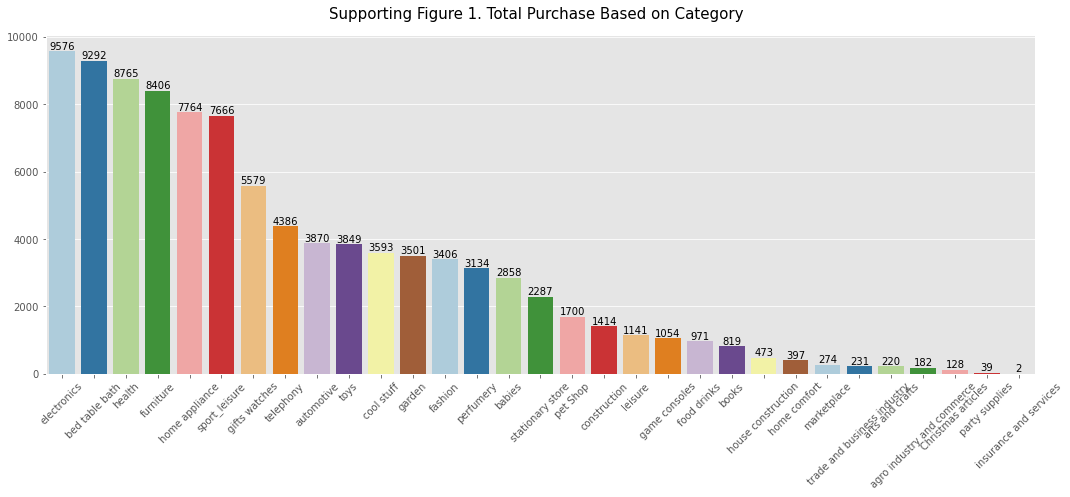

In [5]:
bar_plot_purchase_category ('Supporting Figure 1. Total Purchase Based on Category', 
                            olist_transaction['Simple Category'])

In [6]:
# Creating Dataset for Top 15 Category. This will help for Time-Series Analysis

def slicing_dataset (dataset_name, column_name, parameter):

    data = dataset_name[dataset_name[column_name].isin(parameter)]
    data = pd.DataFrame (data)
    
    return data

In [7]:
list_of_15_categories = ['electronics', 'bed table bath', 'health', 'furniture', 'home appliance', 
                         'sport_leisure', 'gifts watches', 'telephony', 'automotive', 'toys', 'cool stuff', 
                         'garden', 'fashion', 'perfumery', 'babies']

olist_transaction = slicing_dataset (olist_transaction, "Simple Category", list_of_15_categories)

In [8]:
# Analysing Purchase Quantity per year
transaction_aggregation = olist_transaction.groupby(['year', 'Simple Category'])['order_item_id'].sum().unstack().fillna(0)

In [9]:
def bar_plot_purchase_qty (dataset_name, plot_name):
    # Style and Title
    plt.style.use ('ggplot')
    
    # Creating Plot
    chart = dataset_name.plot(kind='bar', stacked=True, figsize =(8,5))

    # Just add a title and rotate the x-axis labels to be horizontal.
    chart.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Adding Title and Adjusting Rotation
    plt.title(plot_name)
    plt.xticks(rotation=0, ha='center')
    
    plt.tight_layout()
    plt.show()

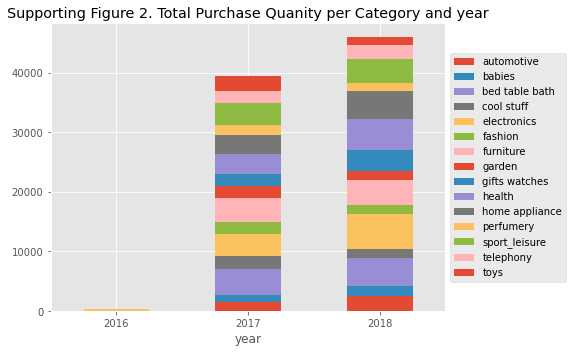

In [10]:
bar_plot_purchase_qty (transaction_aggregation, 'Supporting Figure 2. Total Purchase Quanity per Category and year')

In [11]:
# The overall purchase in 2016 was incredibly low in comparison to 2017 and 2018, as shown by the bar plot above.
# As a result, this analysis excludes all purchases made in 2016.

olist_transaction = olist_transaction.loc[olist_transaction["year"] != 2016]

# 3. Time Series Analysis
In order to create the appropriate marketing strategy, we need to identify the trend of monthly purchases.

In [12]:
# Creating Data Frame for time-series analysis

total_transaction_by_month_category = olist_transaction.date_month_year.value_counts()
total_transaction_by_month_category = pd.DataFrame (total_transaction_by_month_category)

In [13]:
# Creating Annonate to point out particular values

def annonate_category_position ():
    
    # Annonate for Health Care Category
    plt.annotate(text = 'Health Care Category', xy=('2018/8', 780), xytext=('2018/6', 850), 
                 arrowprops=dict(facecolor='black', shrink=0.1),)
    
    # Annonate for Home Appliance Category
    plt.annotate(text = 'Home Appliance Category', xy=('2018/8', 700), xytext=('2018/5', 750), 
                 arrowprops=dict(facecolor='black', shrink=0.1),)
    
    # Annonate for Bed Table Bath Category
    plt.annotate(text = 'Bed Table Bath Category', xy=('2018/8', 570), xytext=('2018/5', 670), 
                 arrowprops=dict(facecolor='black', shrink=0.1),)

In [14]:
# Creating Pivot Table and Time Series

def line_plot_percategory (dataset_name, index_name, column_name, value_name, aggregate_type, figure_title,
                          x_label_name, y_label_name):
    
    # Creating pivot table to aggregate transaction quantity for each category and year
    pivotdataset = dataset_name.pivot_table(index= index_name, 
                                    columns= column_name, values=value_name,  aggfunc=aggregate_type)

    # Visualising the pivot table into time series line plot
    pivotdataset.plot(figsize=(20, 10), title = figure_title, marker='o', fontsize=10)
    
    # Setting up the style, grid, and label
    plt.style.use ('bmh')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    
    # Adjusting the label for x and y axis
    plt.xlabel(x_label_name)
    plt.ylabel (y_label_name)
    
    # Adding Annonate Function
    annonate_category_position ()
    
    plt.show()

Based on the time series analysis above, diving deep into the main 3 features is necessary. The result of time series analysis is displayed in the Report section.

In [15]:
# Creating Dataset for Main 3 Categories

def creating_main_category(total_category_name,main_category_name):
    return  olist_transaction[olist_transaction[total_category_name] == main_category_name]

In [16]:
olist_transaction_bed = creating_main_category('Simple Category','bed table bath')
olist_transaction_home = creating_main_category('Simple Category','home appliance') 
olist_transaction_health = creating_main_category('Simple Category','health')

In [17]:
# Basic Analysis - Purchase Pattern Accross Days for 3 products specified

def bar_plot_days_pattern(bar_title_name, pattern_data1, pattern_data2, pattern_data3,
                         bar_title1, bar_title2, bar_title3):

    # Setting up plot style, axis, and suptitle
    plt.style.use ('ggplot')
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    plt.suptitle (bar_title_name, fontsize=15)
    plt.xticks(rotation=45)

    # Counting transaction based on days
    data_count1 = pattern_data1.dt.day_name().value_counts()
    data_count2 = pattern_data2.dt.day_name().value_counts()
    data_count3 = pattern_data3.dt.day_name().value_counts()

    # Visualising the data into plot
    chart1 = sns.barplot (x = data_count1.index, y = data_count1.values, palette="Paired", ax = axs[0])
    chart2 = sns.barplot (x = data_count2.index, y = data_count2.values, palette="Paired", ax = axs[1])
    chart3 = sns.barplot (x = data_count3.index, y = data_count3.values, palette="Paired", ax = axs[2])

    # Adding Subplot title
    axs[0].set_title (bar_title1)
    axs[0].bar_label(axs[0].containers[0])
    axs[1].set_title (bar_title2)
    axs[1].bar_label(axs[1].containers[0])
    axs[2].set_title (bar_title3)
    axs[2].bar_label(axs[2].containers[0])

    # Adjusting the Label rotation for each plot
    chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
    chart2.set_xticklabels(chart1.get_xticklabels(), rotation=45)
    chart3.set_xticklabels(chart1.get_xticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

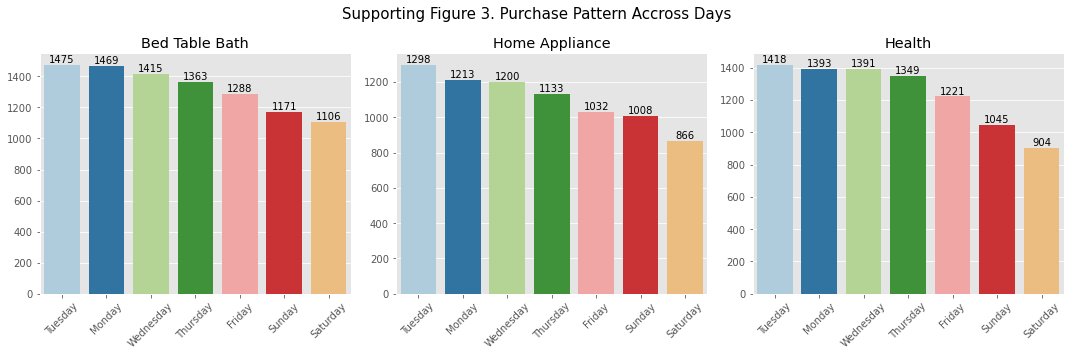

In [18]:
bar_plot_days_pattern ('Supporting Figure 3. Purchase Pattern Accross Days', olist_transaction_bed['order_purchase_timestamp'],
                      olist_transaction_home['order_purchase_timestamp'],
                      olist_transaction_health['order_purchase_timestamp'],
                      'Bed Table Bath', 'Home Appliance', 'Health')

In [19]:
# Payment Type Bed Table Bath
payment_types_bed = olist_transaction_bed.Payment.value_counts().to_frame().reset_index()
payment_types_bed['Percentage'] = round(payment_types_bed.Payment *100/payment_types_bed.Payment.sum(),2)

# Payment Type Home Appliance
payment_types_home = olist_transaction_home.Payment.value_counts().to_frame().reset_index()
payment_types_home['Percentage'] = round(payment_types_home.Payment *100/payment_types_home.Payment.sum(),2)

# Payment Type Health
payment_types_health = olist_transaction_health.Payment.value_counts().to_frame().reset_index()
payment_types_health['Percentage'] = round(payment_types_health.Payment *100/payment_types_health.Payment.sum(),2)

In [20]:
# Basic Analysis - Purchase Payment Method

def bar_plot_payment_pattern (bar_title_name, payment_data1, payment_data2, payment_data3,
                             plot_title1, plot_title2, plot_title3, x_label_name):
    
    # Setting up plot style, axis, and suptitle
    plt.style.use ('ggplot')
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    plt.suptitle (bar_title_name, fontsize=15)
    plt.xticks(rotation=45)

    # Visualising the data into plot
    chart1 = sns.barplot (x='index',y='Percentage',data=payment_data1, palette="Paired", ax = axs[0])
    chart2 = sns.barplot (x='index',y='Percentage',data=payment_data2, palette="Paired", ax = axs[1])
    chart3 = sns.barplot (x='index',y='Percentage',data=payment_data3, palette="Paired", ax = axs[2])

    # Adding Subplot title
    axs[0].set_title (plot_title1)
    axs[0].set(xlabel=x_label_name)
    axs[0].bar_label(axs[0].containers[0])
    axs[1].set_title (plot_title2)
    axs[1].set(xlabel=x_label_name)
    axs[1].bar_label(axs[1].containers[0])
    axs[2].set_title (plot_title3)
    axs[2].set(xlabel=x_label_name)
    axs[2].bar_label(axs[2].containers[0])

    # Adjusting the Label rotation for each plot
    chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
    chart2.set_xticklabels(chart1.get_xticklabels(), rotation=45)
    chart3.set_xticklabels(chart1.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

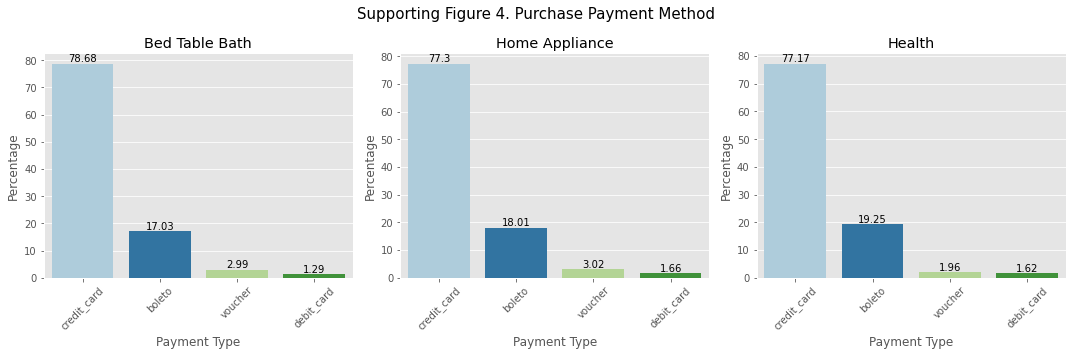

In [21]:
bar_plot_payment_pattern ('Supporting Figure 4. Purchase Payment Method', payment_types_bed, 
                          payment_types_home, payment_types_health,
                         'Bed Table Bath', 'Home Appliance', 'Health', 'Payment Type')

# 4. Geolocation Analysis

In [22]:
!pip install --upgrade requests -q
!pip install geopandas -q

# Importing Pointpats and Centrography Package
!pip install pointpats -q
from pointpats import centrography

# Importing Ellipse to create Ellipse for mean and median location
from matplotlib.patches import Ellipse

# Importing to import map
!pip install contextily -q
import contextily

In [23]:
# Creating dataset for 3 Main Categories
olist_transaction_top3 = pd.concat([olist_transaction_bed, olist_transaction_health, olist_transaction_home])

In [24]:
# Creating mean center based on longitude and latitude

def mean_center_value (dataset_name, longtitude_name, latitude_name):
    mean_center = centrography.mean_center(dataset_name[[longtitude_name, latitude_name]])
    return mean_center

In [25]:
mean_center_top3 = mean_center_value (olist_transaction_top3, "Long", "Lat")

In [26]:
# Creating median center based on longitude and latitude

def med_center_value (dataset_name, longtitude_name, latitude_name):
    median_center = centrography.euclidean_median(dataset_name[[longtitude_name, latitude_name]])
    return median_center

In [27]:
med_center_top3 = med_center_value (olist_transaction_top3, "Long", "Lat")

In [28]:
# Creating major, minor, and rotation for ellipse

def major_minor_rotation (dataset_name, longtitude_name, latitude_name):
    major, minor, rotation = centrography.ellipse(dataset_name[[longtitude_name, latitude_name]])
    return major, minor, rotation

In [29]:
major_top3, minor_top3, rotation_top3 = major_minor_rotation (olist_transaction_top3, "Long", "Lat")

In [30]:
def annonate_city_position():
    
    # Annonate for Brasilia City
    plt.annotate(text = 'Brasilia', xy=(-50, -18), xytext=(-45,  -16), 
                 arrowprops=dict(facecolor='black', shrink=0.01),)
    
    # Annonate for Rio De Janeiro City
    plt.annotate(text = 'Rio De Janeiro', xy=(-45, -23), xytext=(-43,  -20), 
                 arrowprops=dict(facecolor='black', shrink=0.01),)
    
    # Annonate for Rio Grande Do Narte State
    plt.annotate(text = 'Rio Grande Do Norte State', xy=(-35, -7), xytext=(-45,  -10), 
                 arrowprops=dict(facecolor='black', shrink=0.01),)

In [31]:
def geo_map (dataset_name,longitude_column, latitude_column, size_column, hue_column,
                       mean_name, med_name,
                       major_eclipse, minor_eclipse, rotation_eclipse,
                       suptitlename): 
    
    # Creating style
    fig, (ax1) = plt.subplots(1, 1, figsize=(20, 10))
    plt.style.use ('bmh')

    # Visualising Scatter plot based on Goods Category and Payment Category
    joint_axes = sns.scatterplot(x = dataset_name[longitude_column], y = dataset_name[latitude_column], 
                    size =dataset_name[size_column]*10, hue = dataset_name[hue_column], 
                    palette = 'Paired', ax=ax1)
    ax1.scatter(*mean_name, color="red", marker="x", label="Mean Center")
    ax1.scatter(*med_name, color="limegreen", marker="o", label="Median Center")


    # Creating Ellipse
    ellipse = Ellipse(
        xy=mean_name, 
        width=major_eclipse * 2,
        height=minor_eclipse * 2,
        angle=np.rad2deg(
            rotation_eclipse
        ), 
        facecolor="none",
        edgecolor="red",
        linestyle="--",
        linewidth=4.0,
        label="Std. Ellipse",
    )
    ax1.add_patch(ellipse)

    
    # Adding map into visualisation
    contextily.add_basemap(
        ax1, crs="EPSG:4326", source=contextily.providers.CartoDB.Positron
    )
    
    # Adding Suptitle and Subplot title
    plt.suptitle (suptitlename, fontsize=13)
    
    # Adding Annonate
    annonate_city_position()
    
    plt.tight_layout()
    plt.show()

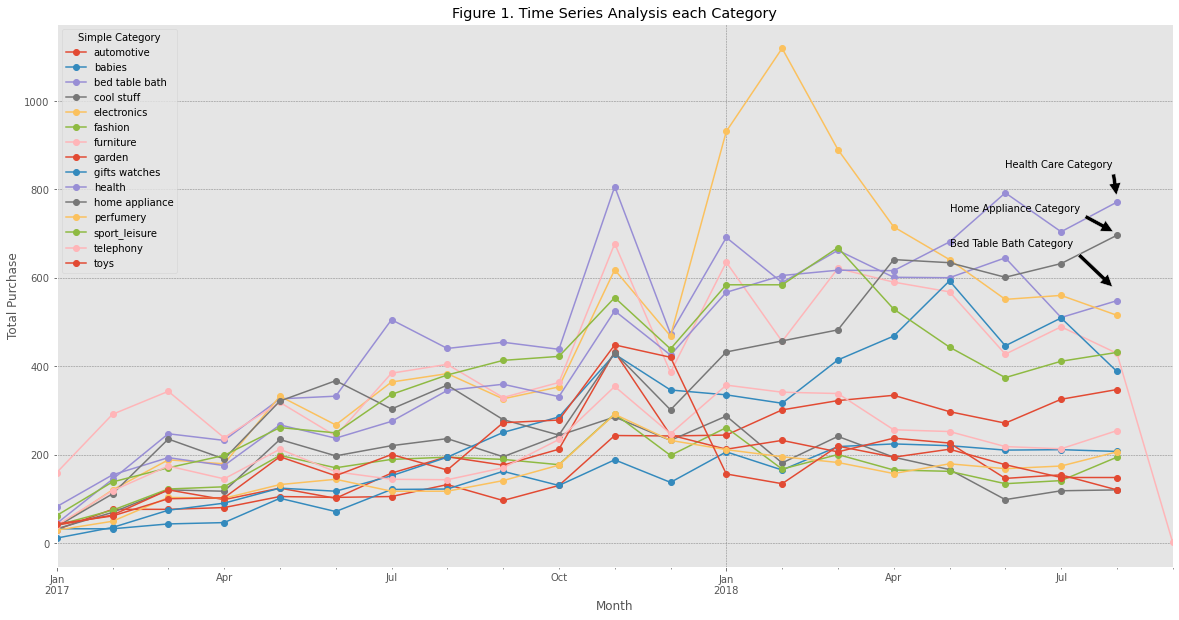

In [32]:
line_plot_percategory (olist_transaction, 'date_month_year', 'Simple Category', 'order_id', 'count', 
                       'Figure 1. Time Series Analysis each Category', 'Month', 'Total Purchase')

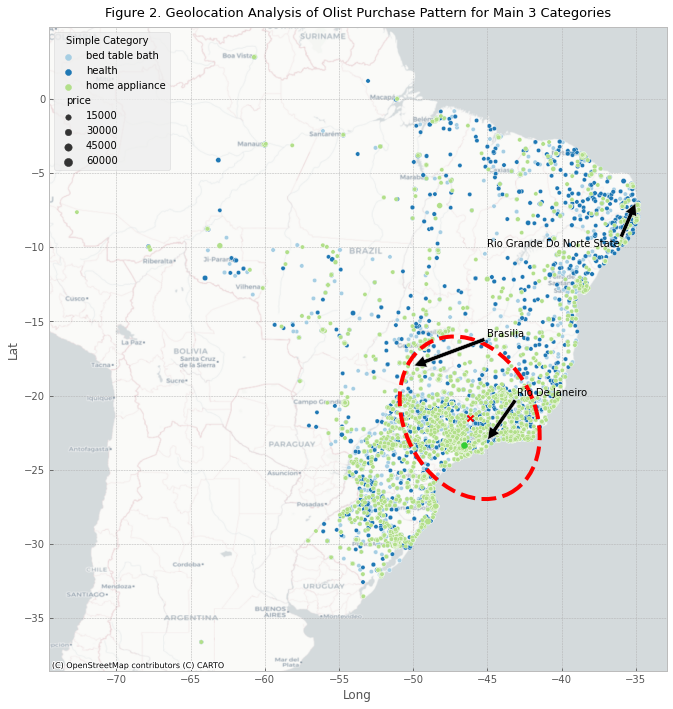

In [33]:
geo_map (olist_transaction_top3,
        "Long", "Lat", "price", "Simple Category",
        mean_center_top3, med_center_top3, 
        major_top3, minor_top3, rotation_top3,
        'Figure 2. Geolocation Analysis of Olist Purchase Pattern for Main 3 Categories')

# References

**References (Package)**: (Not counted as report)

- Arribas-Bel, D (2016) ‘contextily 0.9.2', Python Package Index, 9 November. Available at: https://pypi.org/project/contextily/0.9.2/ (Accessed: 25 November 2022).
- Dabague (2021), 'Brazilian E-Commerce Public Dataset by Olist', Kaggle. Available at: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce (Accessed: 25 November 2022).
- D. Hunter, J. and Droettboom, M. (2022) ‘Matplotlib 3.6.2’, Python Package Index, 3 November. Available at: https://pypi.org/project/matplotlib/ (Accessed: 25 November 2022).
- E. Oliphant, T. and et al. (2022) ‘numpy 1.23.4’, Python Package Index, 12 October. Available at: https://pypi.org/project/numpy/ (Accessed: 25 November 2022).
- Shao, H. (2020) ‘pointpats: Point Pattern Analysis in PySAL’, Python Package Index, 28 July. Available at: https://pypi.org/project/pointpats/ (Accessed: 25 November 2022).
- The Pandas Development Team (2022) ‘pandas: powerful Python data analysis toolkit - pandas 1.5.1’, Python Package Index, 19 October. Available at: https://pypi.org/project/pandas/ (Accessed: 25 November 2022).
- Waskom, M. (2022) ‘Seaborn: statistical data visualization - seaborn 0.12.1’, Python Package Index, 18 October. Available at: https://pypi.org/project/seaborn/ (Accessed: 25 November 2022).
- Zope Foundation and Contributors (2022) ‘DateTime 4.7’, Python Package Index, 14 September. Available at: https://pypi.org/project/DateTime/ (Accessed: 25 November 2022).